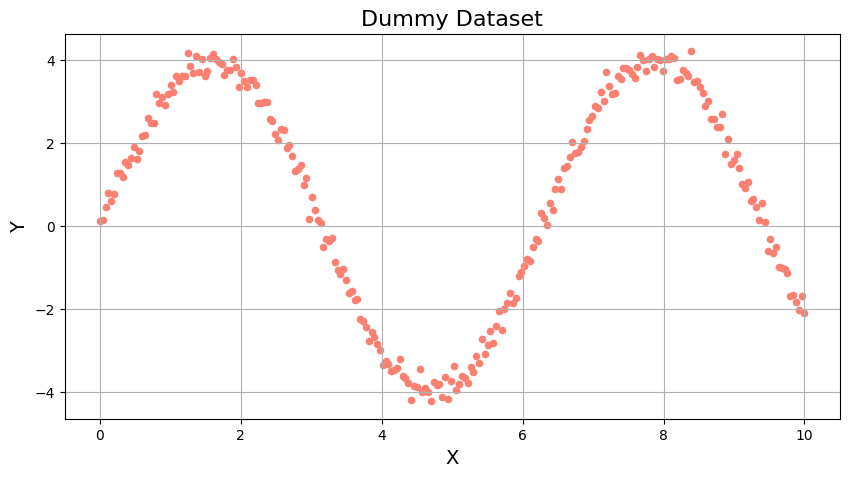

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate x values
x = np.linspace(0, 10, 250)

# Generate y values with a sine function and some noise
amplitude = 4  # Adjust amplitude as needed
noise_level = 0.2  # Adjust noise level as needed
y = amplitude * np.sin(x) + np.random.normal(0, noise_level, len(x))

# Plot the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='salmon', s=20)  # Adjust marker size and color as needed
plt.title("Dummy Dataset", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.grid(True)
plt.show()


In [13]:
x.shape , y.shape

((250,), (250,))

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_depth=3)
tree1.fit(x.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3)

In [15]:
from sklearn.metrics import r2_score

ensemble1 = [tree1,]
tree1_pred  = tree1.predict(x.reshape(-1, 1))

r2_score(y, tree1_pred)

0.878309255080306

In [16]:
tree2 = DecisionTreeRegressor(max_depth=3)
tree2.fit(x.reshape(-1,1),y - tree1_pred)



DecisionTreeRegressor(max_depth=3)

In [17]:
ensemble2 = [tree1, tree2]

tree2_pred = sum(tree.predict(x.reshape(-1,1)) for tree in ensemble2)

r2_score(y, tree2_pred)

0.9503841617905797

In [18]:
tree3 = DecisionTreeRegressor(max_depth=3)
tree3.fit(x.reshape(-1,1), y - tree2_pred)


DecisionTreeRegressor(max_depth=3)

In [19]:
ensemble3 = [tree1,tree2,tree3]

tree3_pred = sum(tree.predict(x.reshape(-1,1)) for tree in ensemble3)

r2_score(y, tree3_pred)

0.9698248792331319

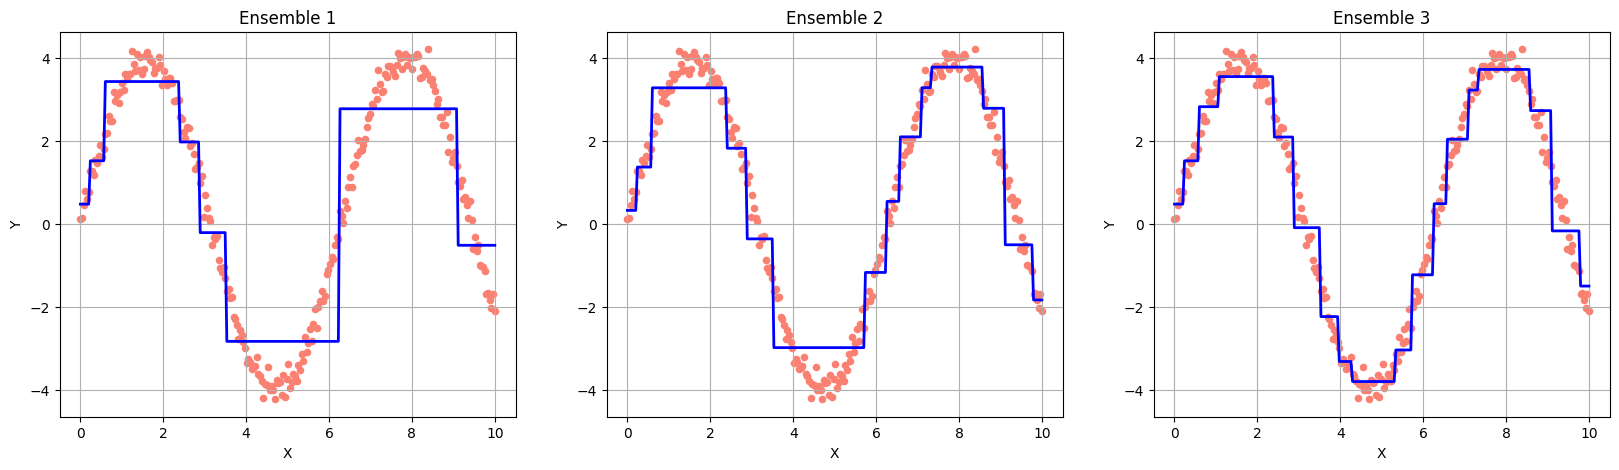

In [20]:
# plot the predictions of each ensemble 

# three subplots 1 row , 3 columns 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# for every ensemble plot the predictions
ensembles = [ensemble1, ensemble2, ensemble3]

for i, ensemble in enumerate(ensembles):
    y_pred = sum(tree.predict(x.reshape(-1,1)) for tree in ensemble)
    axs[i].scatter(x, y, color='salmon', s=20)
    axs[i].plot(x, y_pred, color='blue', linewidth=2)
    axs[i].set_title(f"Ensemble {i+1}")
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("Y")
    axs[i].grid(True)
    

